In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
# fetch dataset
default_of_credit_card_clients = fetch_ucirepo(id=350)

# data (as pandas dataframes)
X = default_of_credit_card_clients.data.features
y = default_of_credit_card_clients.data.targets
df = pd.concat([X, y], axis=1)
column_names = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month']
df.rename(columns = {df.columns[x] : column_names[x] for x in range(len(column_names))}, inplace=True)
df.head()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


From the first few rows of the dataset, we can conclude that all inputs are integers and some of them have a very limited range of possible values such as sex, education marriage, and most importantly, default payment next month.


*   LIMIT_BAL - Amount of the given credit
*   SEX - Gender(1- male, 2- female)
*   EDUCATION - Education Level(1- Graduate School, 2- University, 3- High School, 4- Other)
*   Marriage - Marriage Status(1- Married, 2- Single, 3- Other)
*   Age - Age
*   PAY(0-6) - History of past payments where PAY_0 is payment from September, 2005 and PAY_5 is payment from April, 2005 (-1- Pay Duly, x > 0- Payment delay for x months)
*   BILL_AMT(1-6) - Amount of bill statement where BILL_AMT1 is bill statement is the statement from September, 2005 and BILL_AMT6 is the payment from April, 2005
*   PAY_AMT(1-6) - Amount of previous payment where PAY_AMT1 is amount paid in September, 205 and PAY_AMT6 is the payment from April, 2005

Note: All values involving currency are in NT Dollars

In [ ]:
missing = df.isna()
print(missing.sum().sum())

0


There are no missing values within the dataset.

<Axes: >

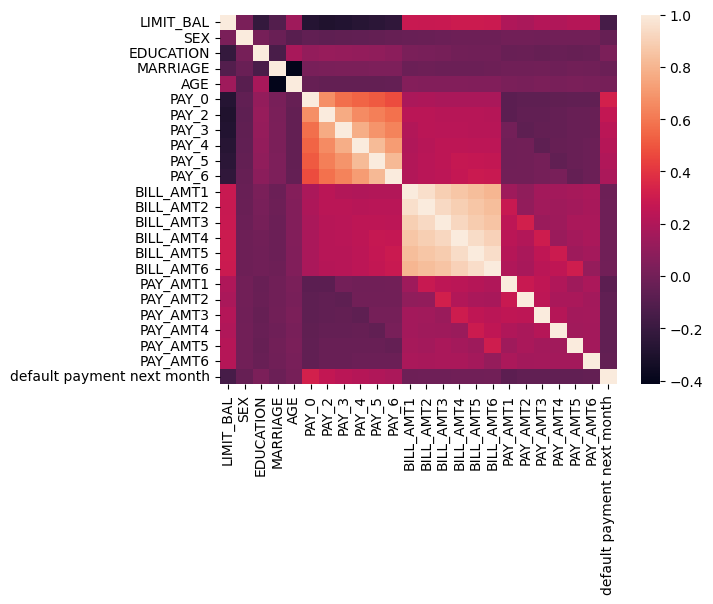

In [ ]:
import seaborn as sns
sns.heatmap(data=df.corr())

From the above image, we can tell that most of the variables have a low correlation coefficient which indicates that the independent variables are loosely correlated to whether or not the default payment was made for the next month.

In [ ]:
x = [x for x in df.columns if (x != "default payment next month" and x != "LIMIT_BAL")]
x = [item for item in x if "AMT" not in item]
list(x)
print(x)
y ="default payment next month"

['SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']


We will graph the above features as if we graph any other features, it will take a very long time to process as there are a lot of possible values.

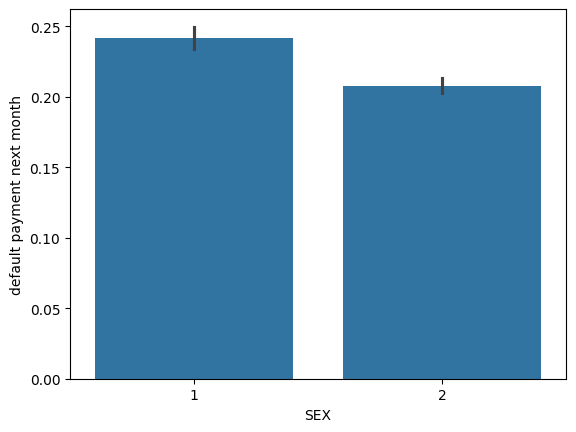

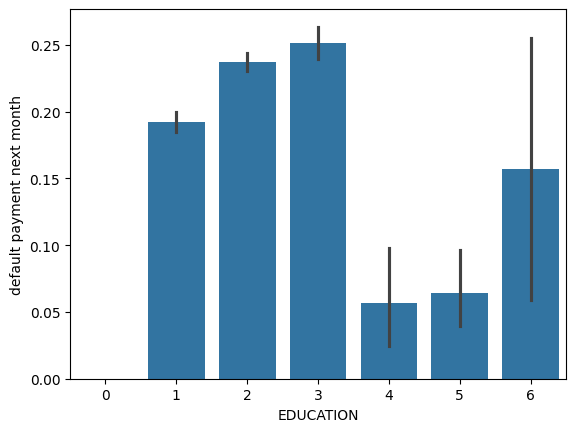

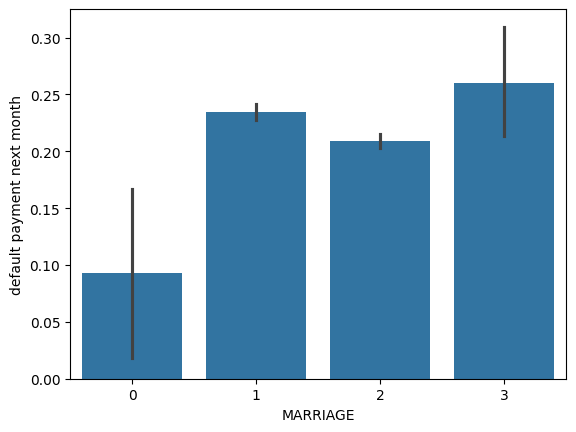

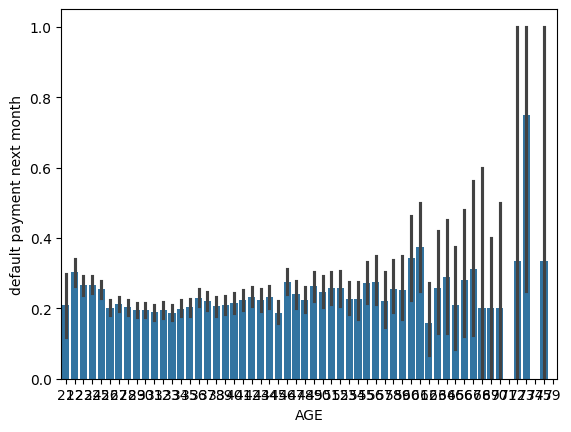

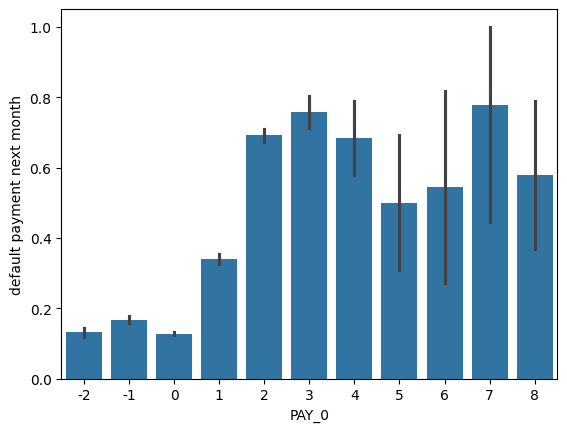

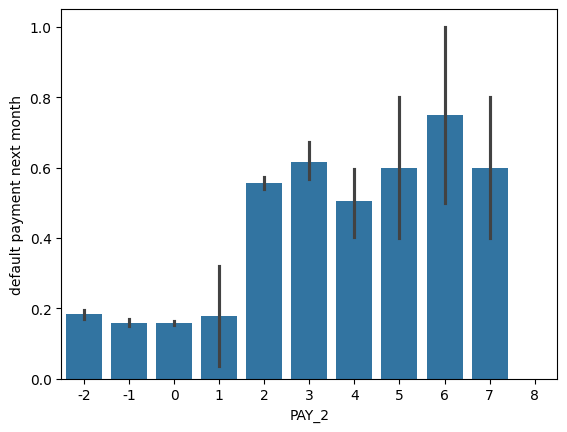

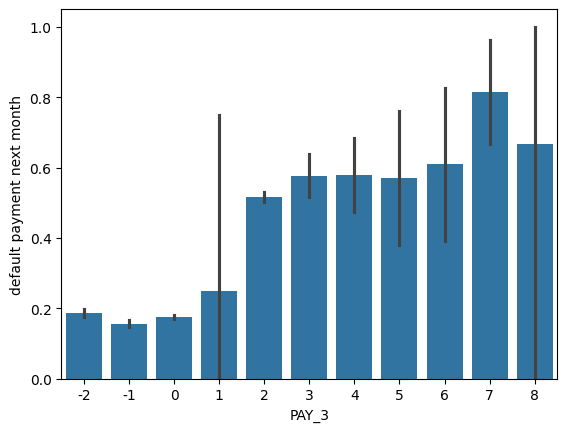

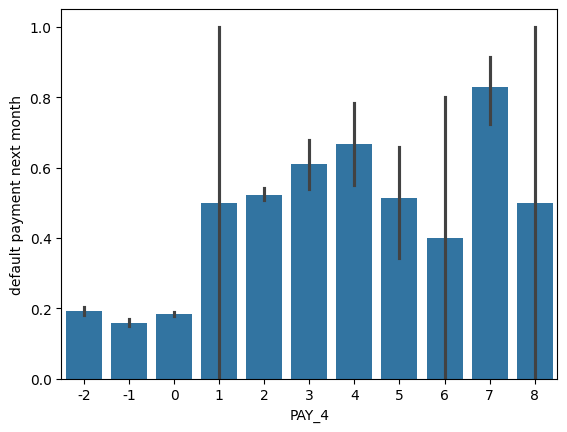

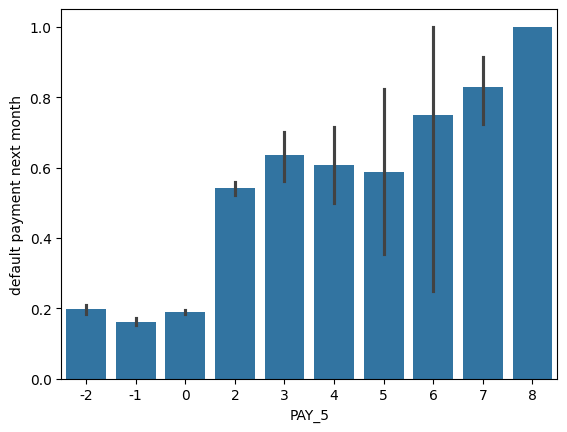

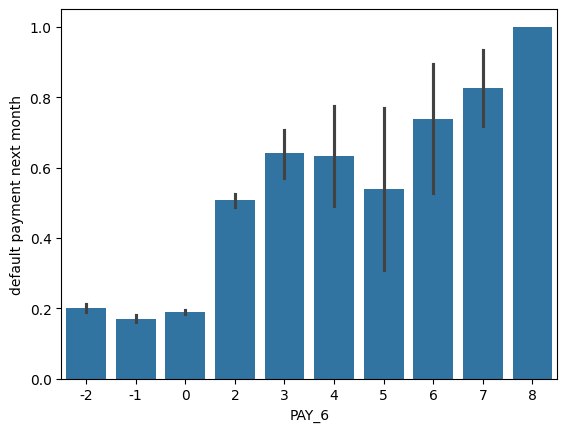

In [ ]:
import matplotlib.pyplot as plt
for col in x:
  sns.barplot(data=df, x=col, y="default payment next month")
  plt.show()

From the above graphs, we can tell that sex, education, marriage, and age have a low correlation with the default payment for the next month.

We can also tell there is a positive correlation between how long payment has been delayed with the default payment for the next month.

Both of these line up with the heat map.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
x_values = df[[x for x in df.columns if x != "default payment next month"]]
y_values = df[y]
model = RandomForestRegressor(random_state=1, n_jobs=-1)
train_x, val_x, train_y, val_y = train_test_split(x_values, y_values, random_state=0)
model.fit(train_x, train_y)

RandomForestRegressor(n_jobs=-1, random_state=1)

I have decided to train a random forest regressor on the dataset. I made no modifications to the data set and included every feature except for the ID.

In [ ]:
prediction = model.predict(val_x)
print(mean_absolute_error(val_y, prediction))

0.2729337746031746


In order to measure the error, I used the mean absolute error which got an estimated error of 0.273/1. However, I noticed that the prediction would generate values between 0 and 1 when defauly payment next month was only in 0s and 1s.

In [ ]:
rounded = [round(x) for x in prediction]
print(mean_absolute_error(val_y, rounded))

0.18186666666666668


By rounding the predicted values, we were able to drastically lower the mean absolute error.

You can try the trained model with your own inputs below. Just uncomment the code below.

In [ ]:
# def inputnum(toprint):
#   try:
#     innum = int(input(toprint + ": "))
#     if ((toprint == "SEX" or toprint == "EDUCATION" or toprint == "AGE" or toprint == "MARRIAGE") and innum <= 0):
#       print("Input must be greater than 0")
#       return inputnum(toprint)
#     elif((innum < -2) and ("PAY" in toprint and "AMT" not in toprint)):
#       print("Input must not be 0")
#       return inputnum(toprint)
#     else:
#       return innum
#   except:
#     print("Invalid input, try again.")
#     return inputnum(toprint)

# dt = {x:inputnum(x) for x in df.columns if x != "default payment next month"}
# print()
# print(round(model.predict(pd.DataFrame(data=dt, index=[0]))[0]))

Also tried to train an Extreme Gradient Boosting Model which ends up with a slightly lower mean absolute value than the Random Forest Regressor.

In [ ]:
from xgboost import XGBRegressor

grad_model = XGBRegressor(n_estimators=500, learning_rate=0.11, early_stopping_rounds=5)
grad_model.fit(train_x, train_y, eval_set=[(val_x, val_y)], verbose=False)

grad_predictions = [round(x) for x in grad_model.predict(val_x)]
print(mean_absolute_error(val_y, grad_predictions))

0.174


Feel free to try the gradient booster model below.

In [ ]:
# def inputnum(toprint):
#   try:
#     innum = int(input(toprint + ": "))
#     if ((toprint == "SEX" or toprint == "EDUCATION" or toprint == "AGE" or toprint == "MARRIAGE") and innum <= 0):
#       print("Input must be greater than 0")
#       return inputnum(toprint)
#     elif((innum < -2) and ("PAY" in toprint and "AMT" not in toprint)):
#       print("Input must not be 0")
#       return inputnum(toprint)
#     else:
#       return innum
#   except:
#     print("Invalid input, try again.")
#     return inputnum(toprint)

# dt = {x:inputnum(x) for x in df.columns if x != "default payment next month"}
# print()
# print(round(grad_model.predict(pd.DataFrame(data=dt, index=[0]))[0]))